<a href="https://colab.research.google.com/github/cmansoo/scratch/blob/main/notebooks/grid_search_example_using_a_loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D, BatchNormalization, Conv2D, Activation, Dense, Flatten, InputLayer
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn.model_selection import ParameterGrid

In [10]:
# mount drive
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab Notebooks/SEIS 764/project") # change this to where your csv file is
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'764 final project images'		        gender_before_smote.h5
 classfiers.ipynb			        gender_final.h5
 Copy_of_764project_gender_optimization.ipynb   image_gen.ipynb
 data					       'SEIS764 project.ipynb'
 funko_file_map.csv			        Untitled0.ipynb
 gender_after_smote_cnn2flatten.h5	       'Untitled document.gdoc'
 gender_after_smote_flatten2cnn.h5


In [11]:
# read
funko_df = pd.read_csv("funko_file_map.csv")
# remove unnecessary paths
funko_df["Image Path"] = funko_df["Image Path"].str.replace("drive/MyDrive/SEIS764/", "")

# change boolean columns to strings
for col in funko_df.columns.drop(["Image Path", "Gender", "Name"]):
  funko_df[col] = np.where(funko_df[col], "y", "n")

# split
train_df, test_df = train_test_split(funko_df, test_size=0.2, random_state=100)

In [12]:
# params
target_size = (224, 224)
batch_size = 8
num_class = 3

# generate data
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image Path",
    y_col="Gender",
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    subset="training"
)

test_data = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image Path",
    y_col="Gender",
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    subset="validation"
)

# define simple model, replace this with your loaded model
model = Sequential()

# conv 1
model.add(InputLayer(input_shape = (224, 224, 3)))
model.add(Conv2D(filters=16, kernel_size=(5,5)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(5,5)))

# conv 2
model.add(Conv2D(32, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

# flatten to add dense layers
model.add(Flatten())

# dense
model.add(Dense(units=3200, activation="relu"))
model.add(Dense(units=1600, activation="relu"))
model.add(Dense(units=800, activation="relu"))
model.add(Dense(units=400, activation="relu"))
model.add(Dense(units=200, activation="relu"))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=50, activation="relu"))
model.add(Dense(units=25, activation="relu"))
model.add(Dense(units=10, activation="relu"))
model.add(Dense(units=num_class, activation="softmax"))

Found 170 validated image filenames belonging to 3 classes.
Found 42 validated image filenames belonging to 3 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 220, 220, 16)      1216      
                                                                 
 batch_normalization_8 (Bat  (None, 220, 220, 16)      64        
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 220, 220, 16)      0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 44, 44, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 42, 42, 32)        4640      
 

In [39]:
# define grid search parameters
params = {
    "epochs": [2, 3],
    "batch_size": [64, 96],
    "learning_rate": [0.01, 0.001],
    "momentum": [0.7, 0.9]
}

grid = list(ParameterGrid(params))

In [40]:
# to save model history
history = {"params":[], "history":[]}

# loop over grid search params
for x in grid:
  print("fitting a model with params {}".format(x))
  # compile
  model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=x["learning_rate"], momentum=x["momentum"]), metrics=["accuracy"])
  # fit
  history["history"].append(
      model.fit(train_data, batch_size=x["batch_size"], epochs=x["epochs"], verbose=True, validation_data=test_data)
  )
  history["params"].append(x)

Epoch 1/2
22/22 [==============================] - 56s 3s/step - loss: 0.7342 - accuracy: 0.6412 - val_loss: 0.7961 - val_accuracy: 0.6429
Epoch 2/2
22/22 [==============================] - 46s 2s/step - loss: 0.6476 - accuracy: 0.6353 - val_loss: 0.7913 - val_accuracy: 0.6429
Epoch 1/2
22/22 [==============================] - 55s 2s/step - loss: 0.5916 - accuracy: 0.7647 - val_loss: 0.7085 - val_accuracy: 0.6429
Epoch 2/2
22/22 [==============================] - 47s 2s/step - loss: 0.4502 - accuracy: 0.8471 - val_loss: 0.8064 - val_accuracy: 0.6905
Epoch 1/2
22/22 [==============================] - 48s 2s/step - loss: 0.3608 - accuracy: 0.8529 - val_loss: 0.6746 - val_accuracy: 0.7381
Epoch 2/2
22/22 [==============================] - 46s 2s/step - loss: 0.2899 - accuracy: 0.8647 - val_loss: 0.7013 - val_accuracy: 0.7143
Epoch 1/2
22/22 [==============================] - 50s 2s/step - loss: 0.2740 - accuracy: 0.8882 - val_loss: 0.6542 - val_accuracy: 0.7857
Epoch 2/2
22/22 [==========

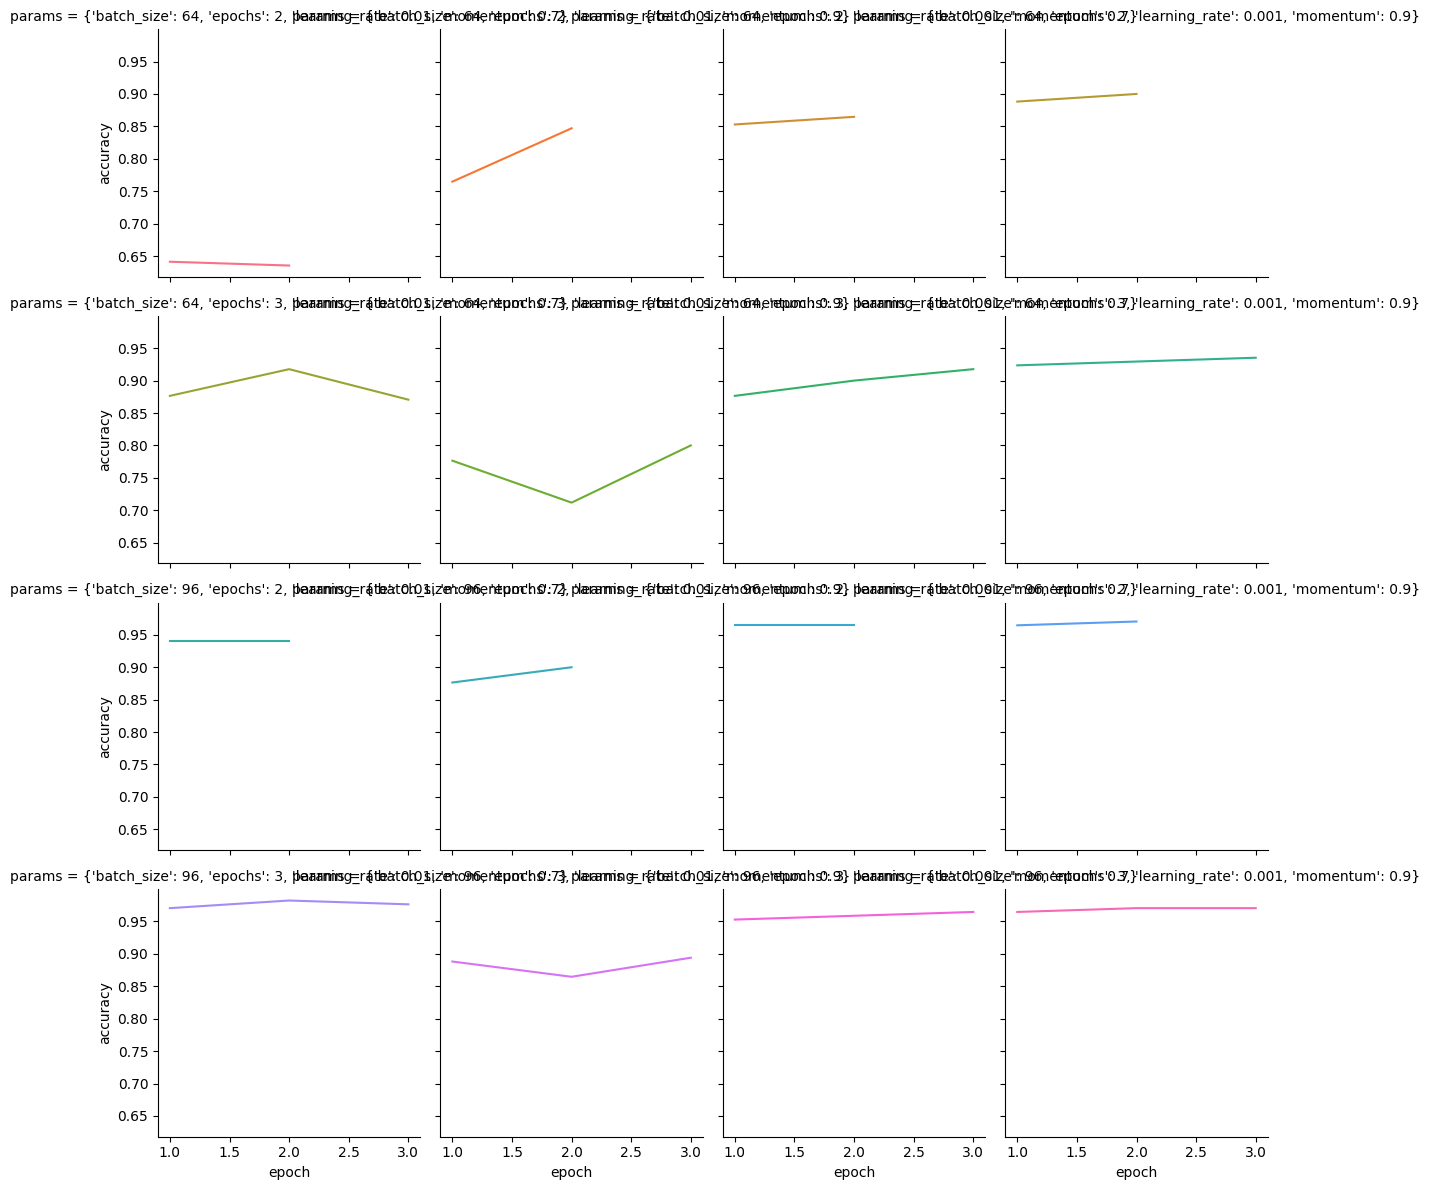

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot model history
accuracy_list = [h.history["accuracy"] for h in history["history"]]
history_df = pd.DataFrame(zip(history["params"], accuracy_list), columns=["params", "accuracy"])
history_df = history_df.explode("accuracy")
history_df["params"] = history_df.apply(lambda row: str(row["params"]), axis=1)
history_df["epoch"] = history_df.groupby(["params"]).cumcount()+1

g = sns.FacetGrid(history_df, col="params", col_wrap=4, hue="params")
g = g.map(sns.lineplot, "epoch", "accuracy")
plt.show()